In [1]:
import numpy as np
import pandas as pd

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm

import scipy.stats

In [2]:
df = pd.read_csv('./pitching_data_1996_2019.csv')
df.head()

starters = df[df["GS"] >= 3]
relievers = df[(df["GS"] < 3) & (df["SV"] <= 5)]
closers = df[df["SV"] > 5]

In [3]:
#group by player age, get batting avg
closers_age = closers[['Age', 'G', 'GS', 'IP', 'W', 'ER', 'SV', 'SO', 'WHIP', 'BB', 'H']].groupby(['Age'], as_index=False).sum()
closers_age['SV_PER_G'] = closers_age['SV'] / closers_age['G']
closers_age['SO_PER_G'] = closers_age['SO'] / closers_age['G']
closers_age['AVG_ERA'] = 9 * (closers_age['ER'] / closers_age['IP'])
closers_age['AVG_WHIP'] = (closers_age['BB'] + closers_age['H']) / closers_age['IP']
closers_age['IP_PER_G'] = closers_age['IP'] / closers_age['G']

closers_age['DELTA_SV_PER_G'] = 0.0
closers_age['PREV_SV_PER_G'] = 0.0
closers_age['SV_PER_G_PERCENT_CHANGE'] = 0.0

closers_age['DELTA_SO_PER_G'] = 0.0
closers_age['PREV_SO_PER_G'] = 0.0
closers_age['SO_PER_G_PERCENT_CHANGE'] = 0.0

closers_age['DELTA_ERA'] = 0.0
closers_age['PREV_ERA'] = 0.0
closers_age['ERA_PERCENT_CHANGE'] = 0.0

closers_age['DELTA_WHIP'] = 0.0
closers_age['PREV_WHIP'] = 0.0
closers_age['WHIP_PERCENT_CHANGE'] = 0.0

closers_age['DELTA_IP_PER_G'] = 0.0
closers_age['PREV_IP_PER_G'] = 0.0
closers_age['IP_PER_G_PERCENT_CHANGE'] = 0.0

In [4]:
for i, r in closers_age.iterrows():
    if i != 0:
        closers_age.at[i,'DELTA_SV_PER_G'] = closers_age.at[i,'SV_PER_G'] - closers_age.at[i-1,'SV_PER_G']
        closers_age.at[i,'PREV_SV_PER_G'] = closers_age.at[i-1,'SV_PER_G']
        closers_age.at[i,'SV_PER_G_PERCENT_CHANGE'] = closers_age.at[i,'DELTA_SV_PER_G']/closers_age.at[i,'PREV_SV_PER_G']
        
        closers_age.at[i,'DELTA_SO_PER_G'] = closers_age.at[i,'SO_PER_G'] - closers_age.at[i-1,'SO_PER_G']
        closers_age.at[i,'PREV_SO_PER_G'] = closers_age.at[i-1,'SO_PER_G']
        closers_age.at[i,'SO_PER_G_PERCENT_CHANGE'] = closers_age.at[i,'DELTA_SO_PER_G']/closers_age.at[i,'PREV_SO_PER_G']
        
        closers_age.at[i,'DELTA_ERA'] = closers_age.at[i,'AVG_ERA'] - closers_age.at[i-1,'AVG_ERA']
        closers_age.at[i,'PREV_ERA'] = closers_age.at[i-1,'AVG_ERA']
        closers_age.at[i,'ERA_PERCENT_CHANGE'] = closers_age.at[i,'DELTA_ERA']/closers_age.at[i,'PREV_ERA']
        
        closers_age.at[i,'DELTA_WHIP'] = closers_age.at[i,'AVG_WHIP'] - closers_age.at[i-1,'AVG_WHIP']
        closers_age.at[i,'PREV_WHIP'] = closers_age.at[i-1,'AVG_WHIP']
        closers_age.at[i,'WHIP_PERCENT_CHANGE'] = closers_age.at[i,'DELTA_WHIP']/closers_age.at[i,'PREV_WHIP']

        closers_age.at[i,'DELTA_IP_PER_G'] = closers_age.at[i,'IP_PER_G'] - closers_age.at[i-1,'IP_PER_G']
        closers_age.at[i,'PREV_IP_PER_G'] = closers_age.at[i-1,'IP_PER_G']
        closers_age.at[i,'IP_PER_G_PERCENT_CHANGE'] = closers_age.at[i,'DELTA_IP_PER_G']/closers_age.at[i,'PREV_IP_PER_G']
        
closers_age.head()

,Age,G,GS,IP,W,ER,SV,SO,WHIP,BB,...,SO_PER_G_PERCENT_CHANGE,DELTA_ERA,PREV_ERA,ERA_PERCENT_CHANGE,DELTA_WHIP,PREV_WHIP,WHIP_PERCENT_CHANGE,DELTA_IP_PER_G,PREV_IP_PER_G,IP_PER_G_PERCENT_CHANGE
0,20,68,0,69.2,1,20,20,75,0.92,16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,21,300,1,330.5,21,113,93,371,6.19,150,...,0.121244,0.476000,2.601156,0.182995,0.276355,0.924855,0.298809,0.084020,1.017647,0.082563
2,22,707,1,770.3,43,268,232,884,13.70,291,...,0.011068,0.054092,3.077156,0.017578,-0.056202,1.201210,-0.046788,-0.012133,1.101667,-0.011014
3,23,1426,7,1494.0,88,503,573,1636,28.90,588,...,-0.082448,-0.101127,3.131248,-0.032296,0.025674,1.145008,0.022423,-0.041847,1.089533,-0.038409
4,24,2778,73,3274.6,165,1152,998,3582,58.94,1320,...,0.123905,0.136068,3.030120,0.044905,0.037709,1.170683,0.032211,0.131076,1.047686,0.125110


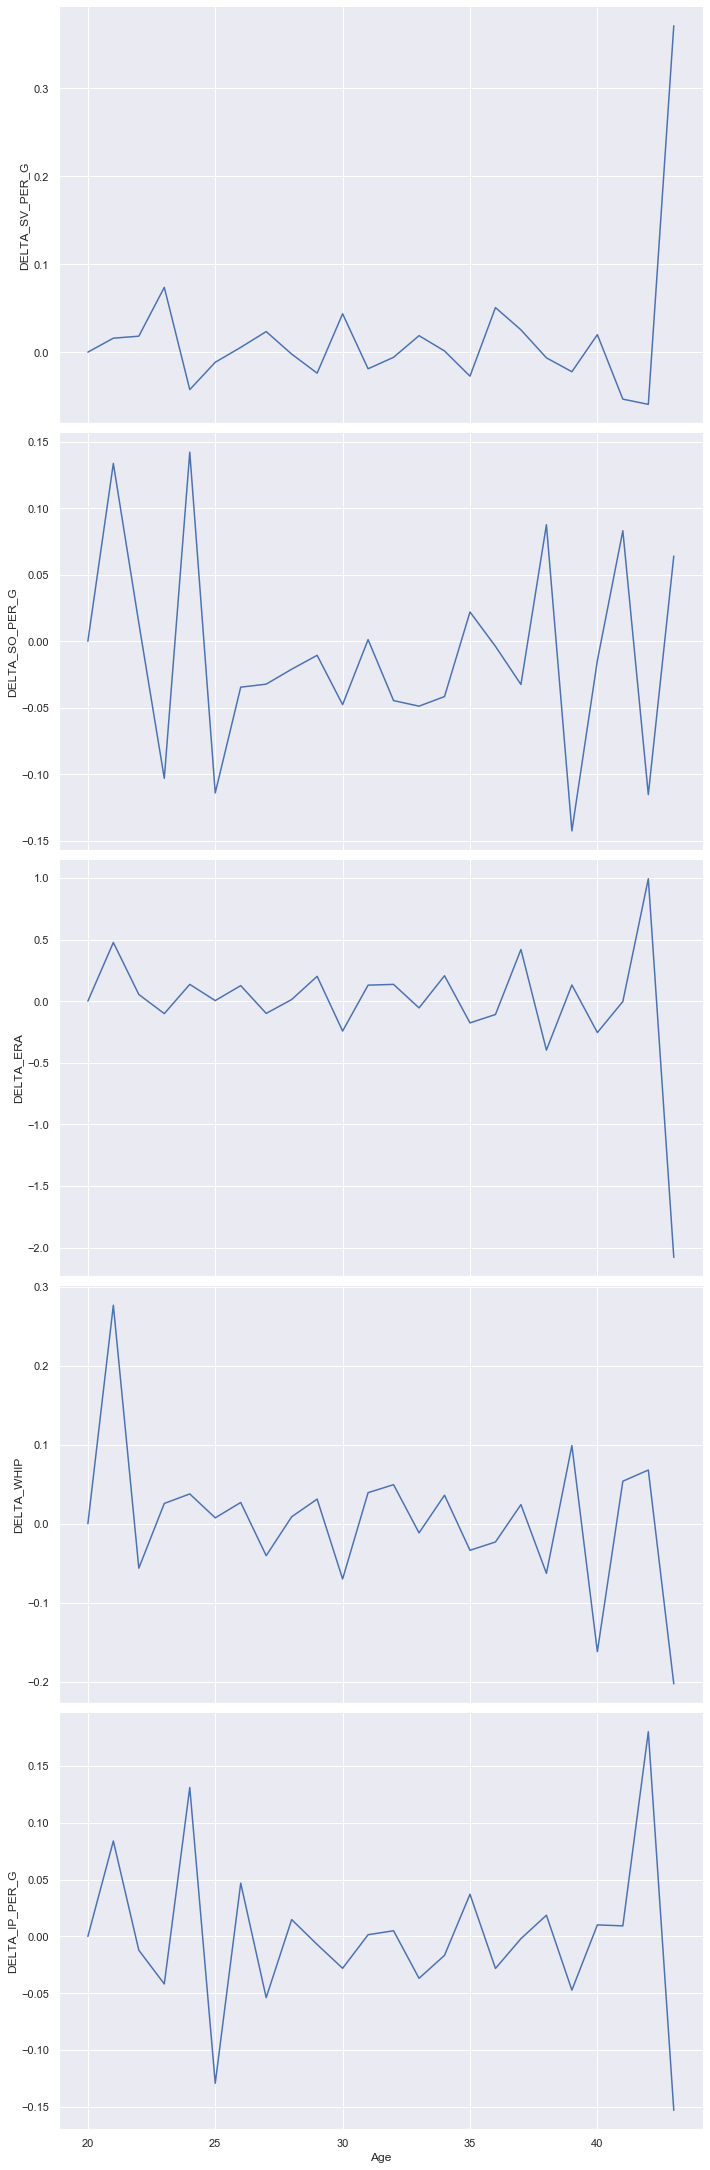

In [5]:
# explore delta of avg by age 
g = sns.PairGrid(closers_age, y_vars=["DELTA_SV_PER_G", "DELTA_SO_PER_G","DELTA_ERA","DELTA_WHIP", "DELTA_IP_PER_G"], x_vars=["Age"], height=6, aspect = 1.6)
g.map(sns.lineplot, markers=True)

In [6]:
# explore percent change by age and previous season's stat
df2 = closers[['key_mlbam', 'Age', 'G', 'GS', 'IP', 'W', 'ERA', 'ER', 'SV', 'SO', 'WHIP', 'BB', 'H']]
df2['SV_PER_G'] = df2['SV'] / df2['G']
df2['SO_PER_G'] = df2['SO'] / df2['G']
df2['IP_PER_G'] = df2['IP'] / df2['G']

df2['DELTA_SV_PER_G'] = float("NaN")
df2['PREV_SV_PER_G'] = float("NaN")
df2['SV_PER_G_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_SO_PER_G'] = float("NaN")
df2['PREV_SO_PER_G'] = float("NaN")
df2['SO_PER_G_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_ERA'] = float("NaN")
df2['PREV_ERA'] = float("NaN")
df2['ERA_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_WHIP'] = float("NaN")
df2['PREV_WHIP'] = float("NaN")
df2['WHIP_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_IP_PER_G'] = float("NaN")
df2['PREV_IP_PER_G'] = float("NaN")
df2['IP_PER_G_PERCENT_CHANGE'] = float("NaN")

for i, r in df2.iterrows():
    prev = df2[ (df2.key_mlbam==r.key_mlbam) & (df2['Age']==(r['Age']-1)) ]

    if len(prev)==1:
        df2.at[i,'DELTA_SV_PER_G'] = r.SV_PER_G - prev.SV_PER_G
        df2.at[i,'PREV_SV_PER_G'] = prev.SV_PER_G
        df2.at[i,'SV_PER_G_PERCENT_CHANGE'] = df2.at[i,'DELTA_SV_PER_G']/df2.at[i,'PREV_SV_PER_G']
        
        df2.at[i,'DELTA_SO_PER_G'] = r.SO_PER_G - prev.SO_PER_G
        df2.at[i,'PREV_SO_PER_G'] = prev.SO_PER_G
        df2.at[i,'SO_PER_G_PERCENT_CHANGE'] = df2.at[i,'DELTA_SO_PER_G']/df2.at[i,'PREV_SO_PER_G']
        
        df2.at[i,'DELTA_ERA'] = r.ERA - prev.ERA
        df2.at[i,'PREV_ERA'] = prev.ERA
        df2.at[i,'ERA_PERCENT_CHANGE'] = df2.at[i,'DELTA_ERA']/df2.at[i,'PREV_ERA']
        
        df2.at[i,'DELTA_WHIP'] = r.WHIP - prev.WHIP
        df2.at[i,'PREV_WHIP'] = prev.WHIP
        df2.at[i,'WHIP_PERCENT_CHANGE'] = df2.at[i,'DELTA_WHIP']/df2.at[i,'PREV_WHIP']
        
        df2.at[i,'DELTA_IP_PER_G'] = r.IP_PER_G - prev.IP_PER_G
        df2.at[i,'PREV_IP_PER_G'] = prev.IP_PER_G
        df2.at[i,'IP_PER_G_PERCENT_CHANGE'] = df2.at[i,'DELTA_IP_PER_G']/df2.at[i,'PREV_IP_PER_G']

# remove any rows where we dont have previous season data...ex: a player's first season
df2.dropna(axis=0, how='any', inplace=True)
df2.head()

/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is tr

,key_mlbam,Age,G,GS,IP,W,ERA,ER,SV,SO,...,SO_PER_G_PERCENT_CHANGE,DELTA_ERA,PREV_ERA,ERA_PERCENT_CHANGE,DELTA_WHIP,PREV_WHIP,WHIP_PERCENT_CHANGE,DELTA_IP_PER_G,PREV_IP_PER_G,IP_PER_G_PERCENT_CHANGE
306,150378,27,77,0,82.1,2,1.20,11,55,137,...,0.201754,-0.77,1.97,-0.390863,-0.17,0.86,-0.197674,0.000000,1.066234,0.000000
661,595014,30,68,0,80.1,9,0.78,7,38,100,...,0.430843,-3.15,3.93,-0.801527,-0.56,1.39,-0.402878,0.133497,1.044444,0.127816
668,119718,28,78,0,88.2,7,1.52,15,40,110,...,0.270972,-2.37,3.89,-0.609254,-0.56,1.51,-0.370861,0.117071,1.013699,0.115489
672,123790,27,66,0,74.2,4,1.57,13,39,124,...,0.123399,-1.13,2.70,-0.418519,-0.40,1.18,-0.338983,0.089760,1.034483,0.086768
723,621242,24,73,0,73.1,0,1.96,16,57,124,...,0.259658,-1.31,3.27,-0.400612,-0.36,1.15,-0.313043,0.001370,1.000000,0.001370


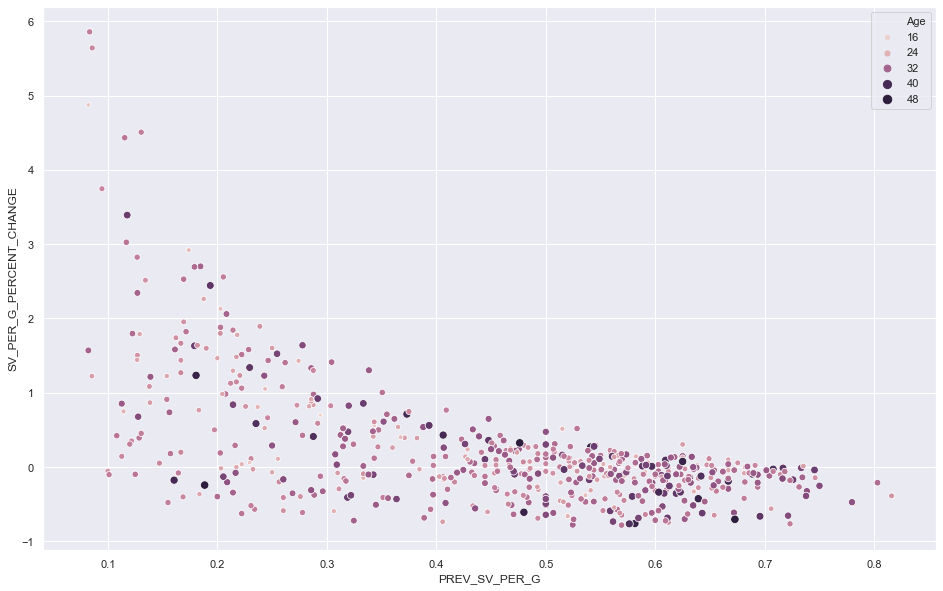

In [7]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_SV_PER_G", y="SV_PER_G_PERCENT_CHANGE", data=df2, size='Age', hue='Age')


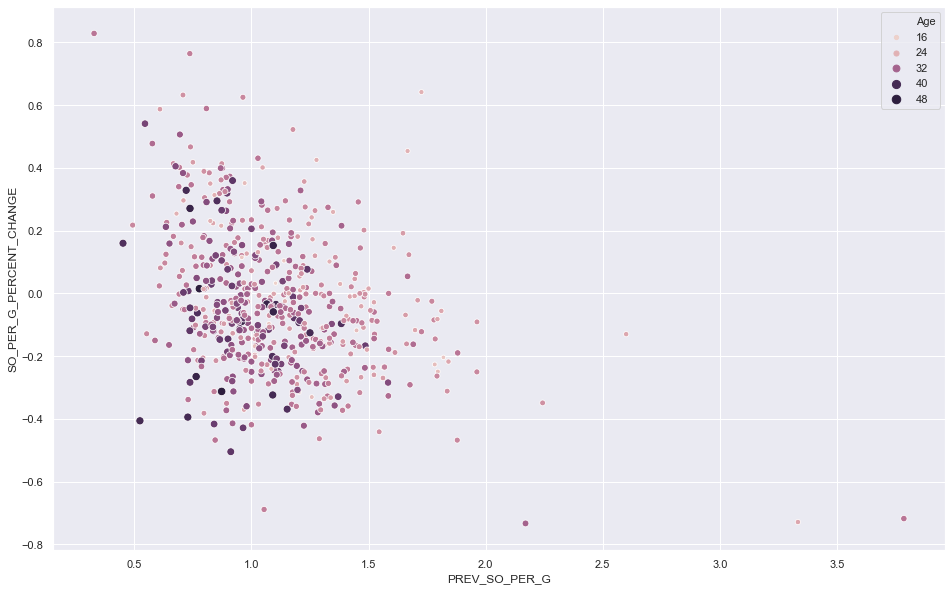

In [8]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_SO_PER_G", y="SO_PER_G_PERCENT_CHANGE", data=df2, size='Age', hue='Age')


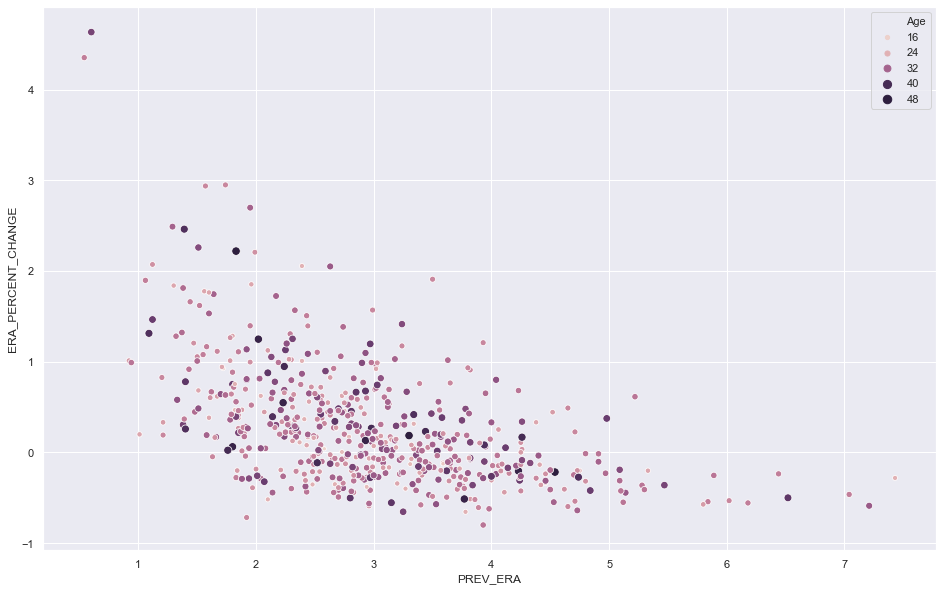

In [9]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_ERA", y="ERA_PERCENT_CHANGE", data=df2, size='Age', hue='Age')


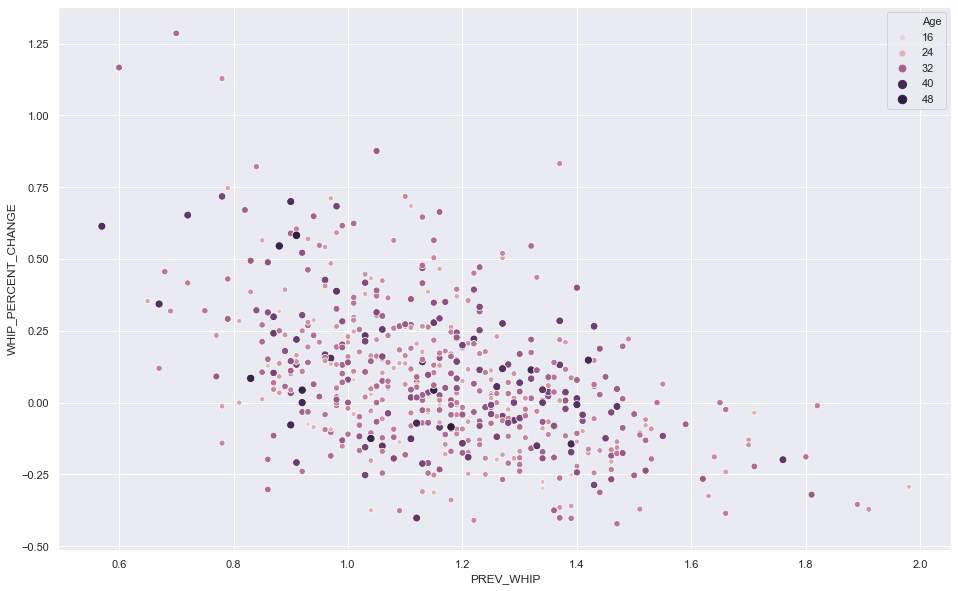

In [10]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_WHIP", y="WHIP_PERCENT_CHANGE", data=df2, size='Age', hue='Age')


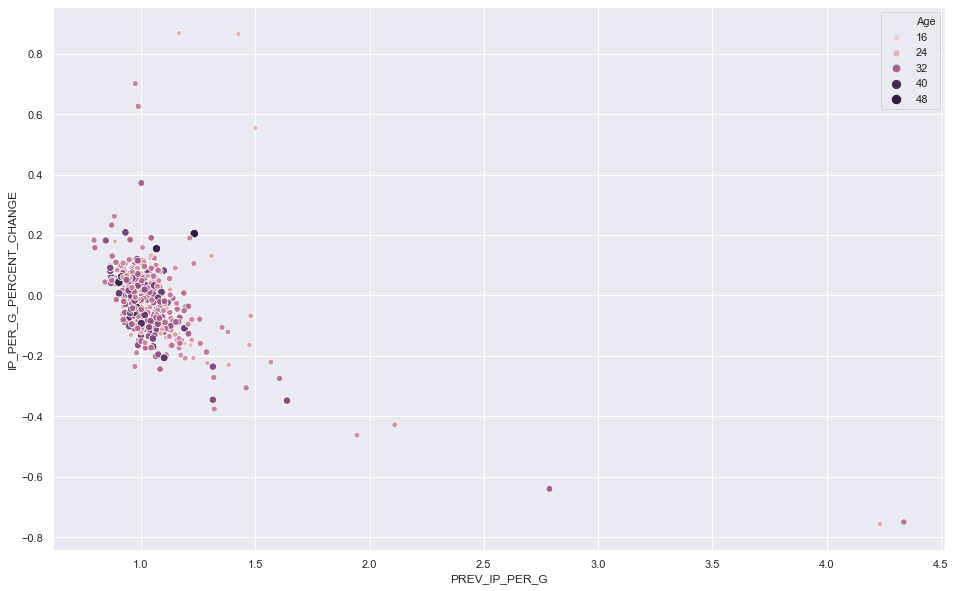

In [11]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_IP_PER_G", y="IP_PER_G_PERCENT_CHANGE", data=df2, size='Age', hue='Age')

In [12]:
mod_svpg = sm.ols(formula="SV_PER_G_PERCENT_CHANGE ~ Age + PREV_SV_PER_G", data=df2[df2.PREV_SV_PER_G > 0]).fit()
print(mod_svpg.summary())

mod_kpg = sm.ols(formula="SO_PER_G_PERCENT_CHANGE ~ Age + PREV_SO_PER_G", data=df2[df2.PREV_SO_PER_G > 0]).fit()
print(mod_kpg.summary())

mod_era = sm.ols(formula="ERA_PERCENT_CHANGE ~ Age + PREV_ERA", data=df2[df2.PREV_ERA > 0]).fit()
print(mod_era.summary())

mod_whip = sm.ols(formula="WHIP_PERCENT_CHANGE ~ Age + PREV_WHIP", data=df2[df2.PREV_WHIP > 0]).fit()
print(mod_whip.summary())

mod_ip_per_g = sm.ols(formula="IP_PER_G_PERCENT_CHANGE ~ Age + PREV_IP_PER_G", data=df2[df2.PREV_IP_PER_G > 0]).fit()
print(mod_ip_per_g.summary())

                               OLS Regression Results                              
Dep. Variable:     SV_PER_G_PERCENT_CHANGE   R-squared:                       0.366
Model:                                 OLS   Adj. R-squared:                  0.364
Method:                      Least Squares   F-statistic:                     162.0
Date:                     Mon, 23 Mar 2020   Prob (F-statistic):           2.93e-56
Time:                             17:24:25   Log-Likelihood:                -570.58
No. Observations:                      564   AIC:                             1147.
Df Residuals:                          561   BIC:                             1160.
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [13]:
def determine_change_prob(stat, predicted, age, prev, data, mod):
    ## predicted_avg:  predicted batting average for upcoming season.  
    ##                 Probability of at least this batting average occuring will be returned.
    ##
    ## age:  integer value, age of player in current season
    ## prev_avg: float, previous season's batting average for player
    ## data: pandas dataframe of all observations that trained model
    ## mod: any linear regression statsmodel with a predict function that takes in a pandas dataframe
    
    percent_change = (predicted-prev)/prev
    prev_stat_name = 'PREV_{0}'.format(stat)
    
    ind = ['Age', prev_stat_name]
    row = [age, prev] 

    # create Pandas Series with defined indexes 
    x = pd.Series(row, index = ind) 

    avg_age = np.mean(data['Age'])
    # might need to change how to get previous season's batting average among all players
    avg_prev_avg = np.mean(data[prev_stat_name])
    
    model_mu = mod.predict(x)
    cov = np.cov(df2['Age'],data[prev_stat_name])[0][1]
    ## formula for model variance here https://link.springer.com/content/pdf/bbm%3A978-0-585-25657-3%2F1.pdf
    model_var = mod.params[1]**2 * np.var(data['Age']) + mod.params[2]**2 * np.var(data[prev_stat_name]) + 2*mod.params[1]*mod.params[2]*cov
    model_std = np.sqrt(model_var)
    
    if stat in ['ERA', 'WHIP']:
        prob = scipy.stats.norm(model_mu, model_std).cdf(percent_change)[0]
    else:
        prob = 1-scipy.stats.norm(model_mu, model_std).cdf(percent_change)[0]
        
    return prob, percent_change, predicted


In [14]:
determine_change_prob('SV_PER_G', 0.5, 26, 0.6, df2[df2.PREV_SV_PER_G > 0], mod_svpg)

(0.4771969555692699, -0.16666666666666663, 0.5)